In [ ]:
!conda install -c conda-forge imbalanced-learn

In [1]:
!pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv('customer_churn.csv')

display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# X/y split
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = data['Churn']

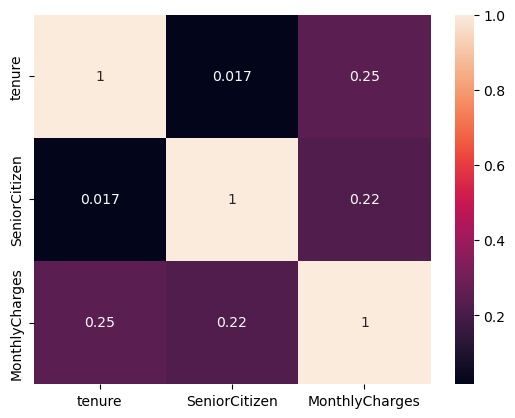

In [13]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
y_train.isna().sum()
y_test.isna().sum()

0

In [16]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,-0.340191,-0.435476,-0.514314
6397,0.883210,2.296336,0.017840
6043,-1.196572,-0.435476,-0.819594
5309,1.168670,-0.435476,-1.483535
3000,-0.829552,-0.435476,0.658427


In [17]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [19]:
lr.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [20]:
lr.predict_proba(X_train_scaled).shape

(5282, 2)

In [21]:
lr.predict(X_train_scaled)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [54]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

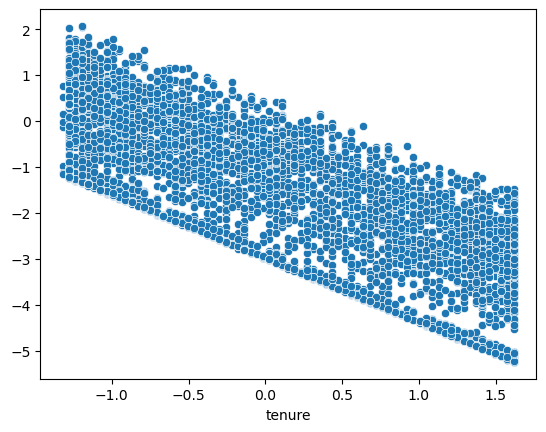

In [24]:
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

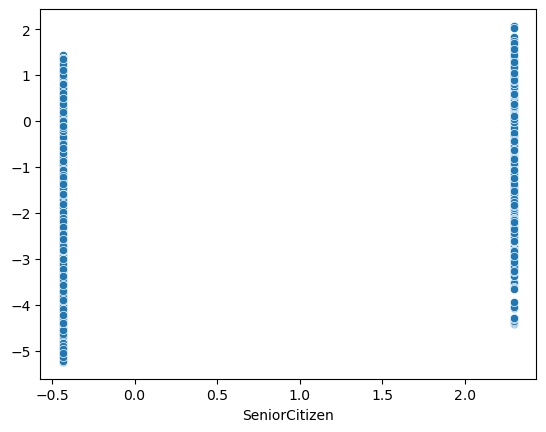

In [25]:
sns.scatterplot(y = logits,x = X_train_scaled['SeniorCitizen']);
plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.78


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.78
The Kappa in the TEST set is: 0.38


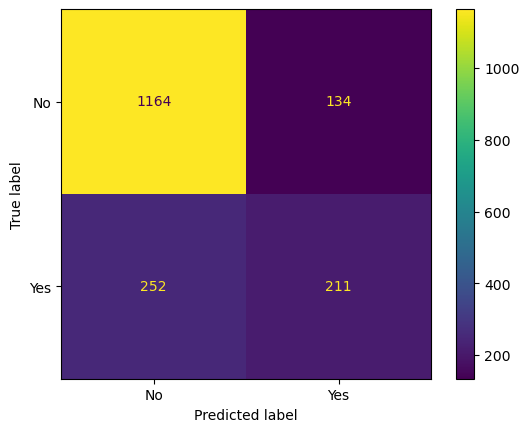

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [32]:
majority_indexes = y_train[y_train == 0].index
minority_indexes = y_train[y_train == 1].index

In [33]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

In [34]:
print(X_train.shape)
print(y_train[y_train== 0].shape)

(5282, 3)
(0,)


In [35]:
ros = RandomOverSampler(random_state=42)

X_train_over, y_train_over = ros.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))
print(y_train_over.value_counts())

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,No
1,0.883210,2.296336,0.017840,No
2,-1.196572,-0.435476,-0.819594,Yes
3,1.168670,-0.435476,-1.483535,No
4,-0.829552,-0.435476,0.658427,Yes


Resampled dataset shape Counter({'No': 3876, 'Yes': 3876})
No     3876
Yes    3876
Name: Churn, dtype: int64


In [39]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_over, y_train_over)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
#print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
#print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
#print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The Kappa in the TEST set is: 0.37


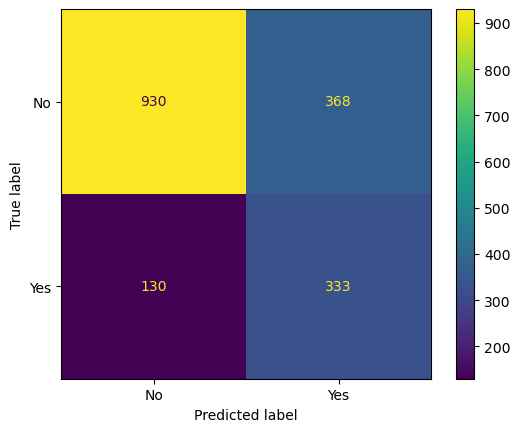

In [40]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [41]:
from imblearn.under_sampling import RandomUnderSampler

In [42]:
y_train[y_train == 1].shape

(0,)

In [43]:
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_under,y_train_under],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_under))

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.842430,-0.435476,0.313111,No
1,0.720089,-0.435476,1.499197,No
2,1.046330,-0.435476,-0.646101,No
3,-1.074232,-0.435476,-1.478531,No
4,-0.584871,-0.435476,-1.488540,No


Resampled dataset shape Counter({'No': 1406, 'Yes': 1406})


In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_under, y_train_under)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
#print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
#print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
#print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The Kappa in the TEST set is: 0.37


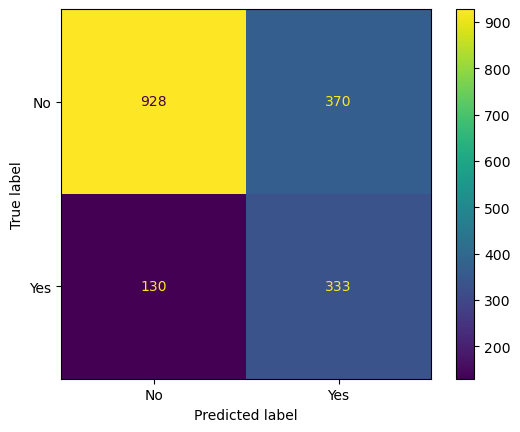

In [46]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [49]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7752, 3)


In [50]:
y_train_SMOTE.value_counts()

No     3876
Yes    3876
Name: Churn, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
#print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
#print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
#print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The Kappa in the TEST set is: 0.38


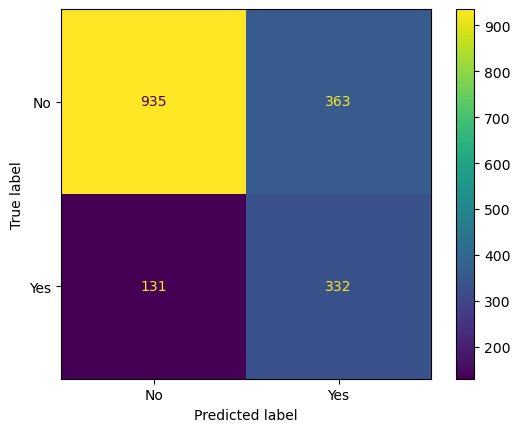

In [53]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()